In [16]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 1)

In [4]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
## To see the decision tree, we need to export it into pdf, to do so,

DecisionTreeClassifier()

In [5]:
## We need to import a function 
from sklearn.tree import export_graphviz

In [6]:
## we use this method.
## out_file means we dont want to save this into any outside file, I want this function to return the data to me.
## this will return dot_data which is basically .dot format which we convert it into .pdf  
import pydotplus

dot_data = export_graphviz(clf, out_file = None, feature_names=iris.feature_names, class_names = iris.target_names)
## after running this we get our .data file

In [16]:
## Now to convert .data into pdf file, we need to use pydotplus, which has function graph_from_dot_data(dot_data).
## It will return a graph object.
graph = pydotplus.graph_from_dot_data(dot_data)
## After this we need to call write_pdf()

In [17]:
graph.write_pdf('iris.pdf')

True

In [8]:
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [7]:
from sklearn.metrics import confusion_matrix

In [9]:
confusion_matrix(y_train, y_train_pred)

array([[37,  0,  0],
       [ 0, 34,  0],
       [ 0,  0, 41]], dtype=int64)

In [10]:
confusion_matrix(y_test, y_test_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

**Plotting the Decision Surface of Decision Trees**

In [11]:
import matplotlib.pyplot as plt

In [12]:
# first we define no of classes, plot colors and the step
n_classes = 3  # varies on datasets
plot_colors = 'ryb'
plot_step = 0.02


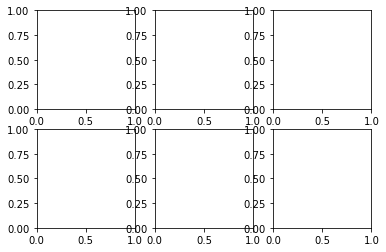

In [13]:
# we will take only two corrosponding features at once to plot
import numpy as np

for pairindex, pair in enumerate([[0,1],[0,2], [0,3], [1, 2], [1,3],[2,3]]):
    # now taking two features
    X = iris.data[:, pair]
    Y = iris.target
    
    # train
    clf = DecisionTreeClassifier().fit(X, Y)
    
    # Plotting the Decision Boundary
    plt.subplot(2, 3, pairindex  +1)   # will create empty subplot
    
    # to define a plot, we must know the Max and min value of the feature.
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    
    #
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    



    

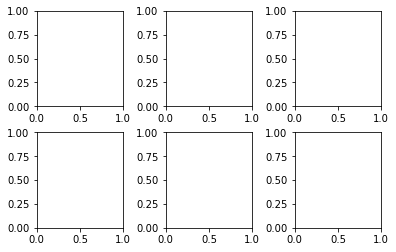

In [14]:
# we will take only two corrosponding features at once to plot
import numpy as np

for pairindex, pair in enumerate([[0,1],[0,2], [0,3], [1, 2], [1,3],[2,3]]):
    # now taking two features
    X = iris.data[:, pair]
    Y = iris.target
    
    # train
    clf = DecisionTreeClassifier().fit(X, Y)
    
    # Plotting the Decision Boundary
    plt.subplot(2, 3, pairindex  +1)   # will create empty subplot
    
    # to define a plot, we must know the Max and min value of the feature.
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    
    #
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    
    # for fixing the layout, we can compare from above what it does  
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)


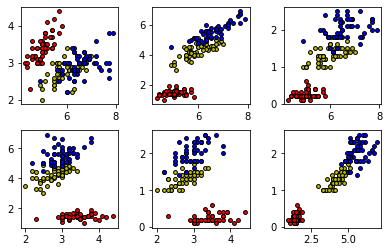

In [15]:
# we will take only two corrosponding features at once to plot
import numpy as np

for pairindex, pair in enumerate([[0,1],[0,2], [0,3], [1, 2], [1,3],[2,3]]):
    # now taking two features
    X = iris.data[:, pair]
    Y = iris.target
    
    # train
    clf = DecisionTreeClassifier().fit(X, Y)
    
    # Plotting the Decision Boundary
    plt.subplot(2, 3, pairindex  +1)   # will create empty subplot
    
    # to define a plot, we must know the Max and min value of the feature.
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    
    #
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    
    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(Y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )
    
    

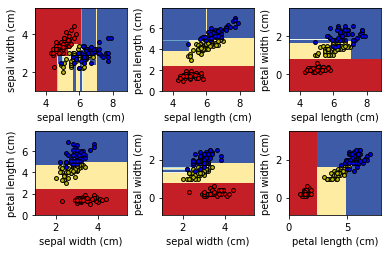

In [16]:
# now plotting the decision surface
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

In [17]:
# plotting decision surface
def plot_decision_boundaries(X, y, model_class, **model_params):
    """Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    
    One possible improvement could be to use all columns fot fitting
    and using the first 2 columns and median of all other columns
    for predicting.
    
    Adopted from:
    http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
    http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
    """
    reduced_data = X[:, :2]
    model = model_class(**model_params)
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    return plt

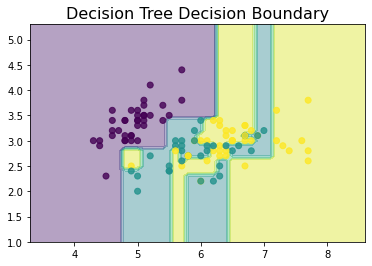

In [20]:
# plotting decision surface
import matplotlib.pyplot as plt

plt.figure()
plt.title('Decision Tree Decision Boundary', fontsize = 16)
plot_decision_boundaries(x_train, y_train, DecisionTreeClassifier)
plt.show()

## Using DecisionTreeRegressor

In [21]:
from sklearn import tree

In [22]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [23]:
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 1)

In [24]:
clf = tree.DecisionTreeRegressor()

In [25]:
clf.fit(x_train, y_train)

DecisionTreeRegressor()

In [27]:
y_pred = clf.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)

In [29]:
score

0.9736842105263158